# Exploratory Data Analysis 

## 1. Understanding project

In [2]:
import pandas as pd

datasets = {}

for year in range(2018, 2023):
    filename = f'Datacompleta_{year}.dta'
    datasets[f'data_{year}'] = pd.io.stata.read_stata(filename)

# Concatenate
data = pd.concat(datasets.values(), ignore_index=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312721 entries, 0 to 312720
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   año          312721 non-null  object  
 1   horas        312719 non-null  float64 
 2   edad         312721 non-null  int8    
 3   salario      125405 non-null  float64 
 4   fac500a      312721 non-null  float32 
 5   urbano       312721 non-null  category
 6   hombre       312721 non-null  category
 7   escolaridad  312721 non-null  category
 8   formal       312721 non-null  category
 9   logsal       125405 non-null  float32 
 10  edadsq       312721 non-null  float32 
dtypes: category(4), float32(3), float64(2), int8(1), object(1)
memory usage: 12.2+ MB


## 2. Data preparation

### The problem

The initial purpose is creating a model of salary based in Mincer equation (1966). So the dependent variable is log-salary. The others variables are here:

* <b>año</b>
* <b>horas</b>: Worked hours per week 
* <b>edad</b>: Years old
* <b>salario</b>: Monthly nominal wage in soles 
* <b>fac500a</b>: Expansion factor
* <b>urbano</b>: Urban or rural area indicator
* <b>hombre</b>: Gender indicator
* <b>escolaridad</b>: education level
* <b>formal</b>: Formal or informal job indicator
* <b>logsal</b>: Logarithm of salary
* <b>edadsq</b>: Age squared

In [4]:
data.shape

(312721, 11)

In [5]:
data.columns

Index(['año', 'horas', 'edad', 'salario', 'fac500a', 'urbano', 'hombre',
       'escolaridad', 'formal', 'logsal', 'edadsq'],
      dtype='object')

In [6]:
data.sample(10)

,año,horas,edad,salario,fac500a,urbano,hombre,escolaridad,formal,logsal,edadsq
79327,2019,40.0,45,3091.944336,125.261024,Urbana,Hombre,[sup. univ. completa - posgrado],Formal,8.036555,2025.0
153148,2020,60.0,26,927.750000,315.817200,Urbana,Mujer,[sec. completa - sup. no univ incompleta],Informal,6.832762,676.0
67607,2018,16.0,18,NaN,431.305267,Urbana,Hombre,[sec. completa - sup. no univ incompleta],Informal,NaN,324.0
169028,2020,40.0,57,NaN,12.285619,Urbana,Hombre,[prim. completa - sec. incompleta],Informal,NaN,3249.0
285310,2022,48.0,38,1339.916667,544.724365,Urbana,Hombre,[prim. completa - sec. incompleta],Informal,7.200363,1444.0
156708,2020,28.0,15,NaN,147.936691,Rural,Hombre,[prim. completa - sec. incompleta],Informal,NaN,225.0
305061,2022,56.0,56,1192.333333,187.621002,Rural,Hombre,[prim. completa - sec. incompleta],Informal,7.083667,3136.0
30570,2018,84.0,28,947.833333,1248.619507,Urbana,Mujer,[sup. no univ completa - sup. univ incompleta],Formal,6.854179,784.0
270835,2022,48.0,73,NaN,89.288406,Rural,Hombre,[prim. completa - sec. incompleta],Informal,NaN,5329.0
113916,2019,40.0,35,2483.166667,306.585815,Urbana,Hombre,[sup. univ. completa - posgrado],Formal,7.817290,1225.0


In [7]:
databk=data

## 3  : Graph and descriptive numeric analysis

### 'Logsal'

Logsal is the objective variable of this data group. So it's important to do a deep analysis of this.

In [8]:
# Basic statistics
data['logsal'].describe()

count    125405.000000
mean          6.920331
std           0.929751
min           1.609438
25%           6.483490
50%           6.998890
75%           7.508880
max          10.311796
Name: logsal, dtype: float64

In [9]:
#pip install seaborn --upgrade

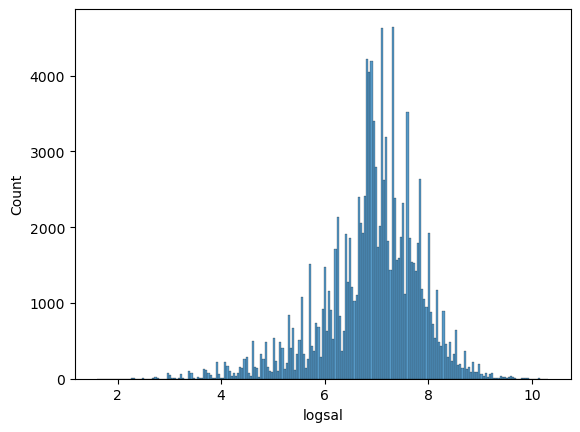

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seaborn histogram:

sns.histplot(data['logsal'])
plt.show()

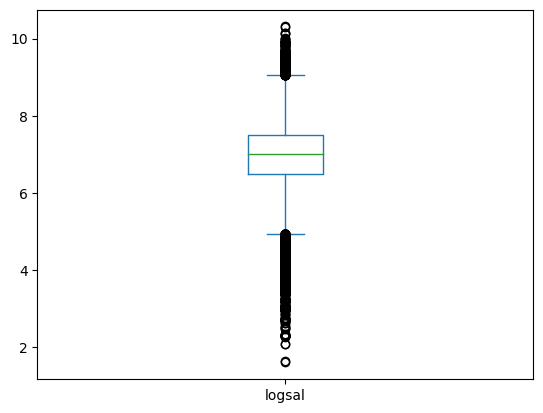

In [11]:
# Box plot:

data['logsal'].plot(kind='box')
plt.show()

It's easy to see:

* Positive asymetry
* Outliers

In [12]:
# Interquantile range and variation coefficient
import numpy as np
interquantile = lambda x: x.quantile(0.75)-x.quantile(0.25)
cv = lambda x: x.std()/x.mean()

f = {'logsal' : [interquantile, cv, np.mean]}

data.agg(IQ=('logsal', interquantile), CV=('logsal', cv), mean=('logsal', np.mean))

,logsal
IQ,1.025391
CV,0.134351
mean,6.920331


### Dependent numeric variables

In [13]:
#Filtering numeric variables
list(data.describe().columns)

['horas', 'edad', 'salario', 'fac500a', 'logsal', 'edadsq']

In [14]:
list_quantitatives= list(data.describe().columns)
list_quantitatives

['horas', 'edad', 'salario', 'fac500a', 'logsal', 'edadsq']

In [15]:
list_quantitatives.remove('salario')
list_quantitatives.remove('fac500a')

In [16]:
list_quantitatives

['horas', 'edad', 'logsal', 'edadsq']

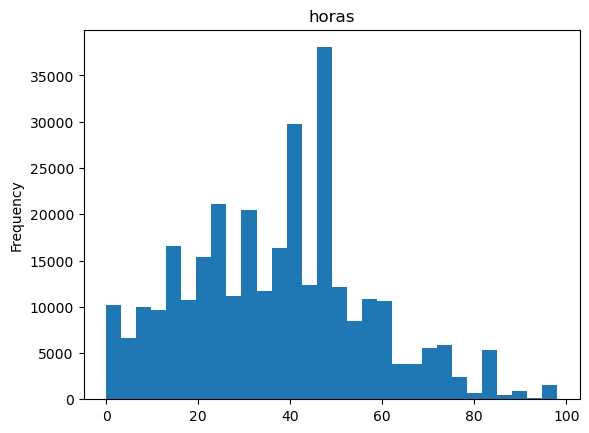

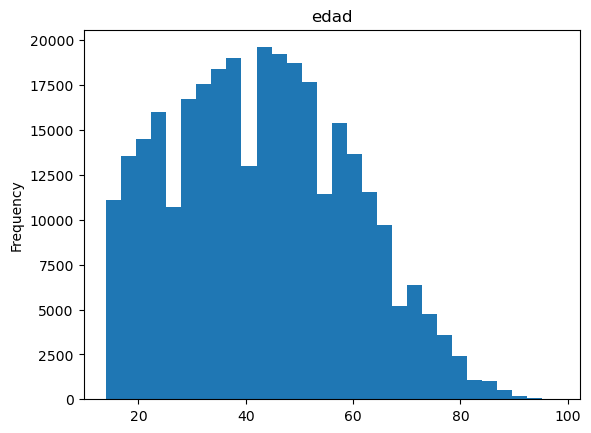

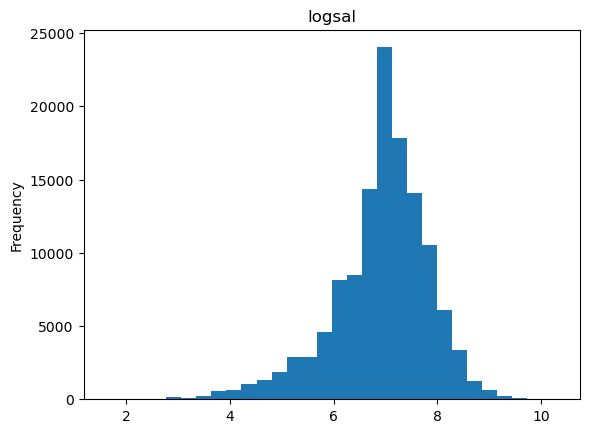

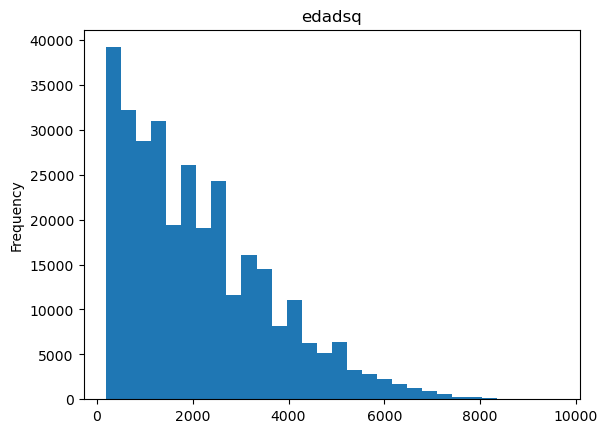

In [17]:
# histograms
for var in list_quantitatives:
    data[var].plot(kind='hist', title=var, bins=30)
    plt.show()

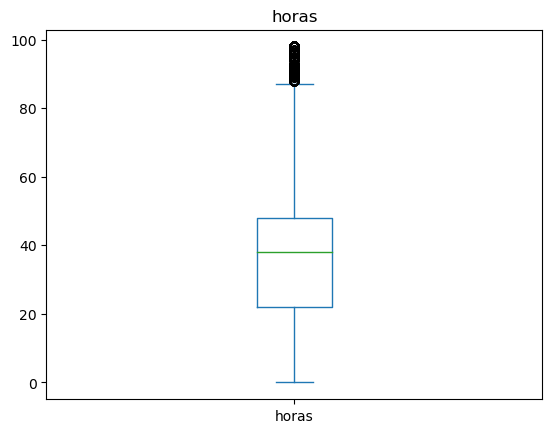

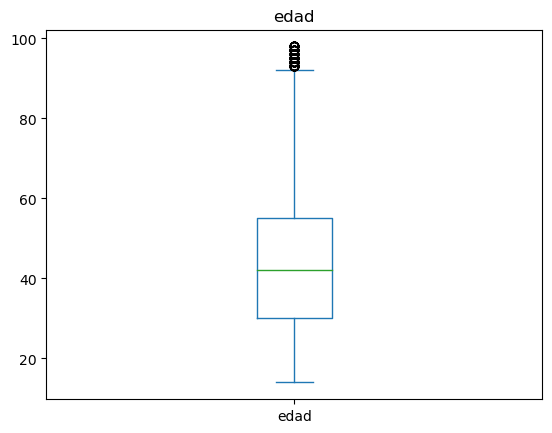

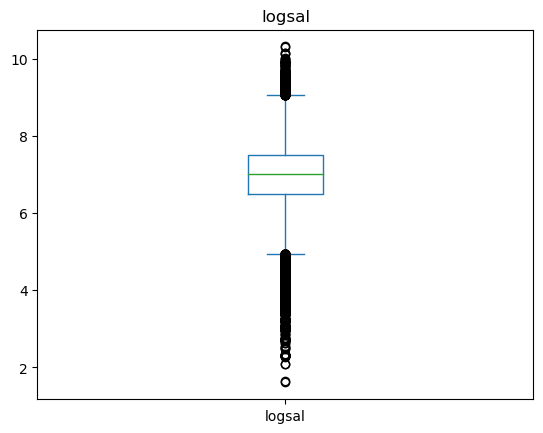

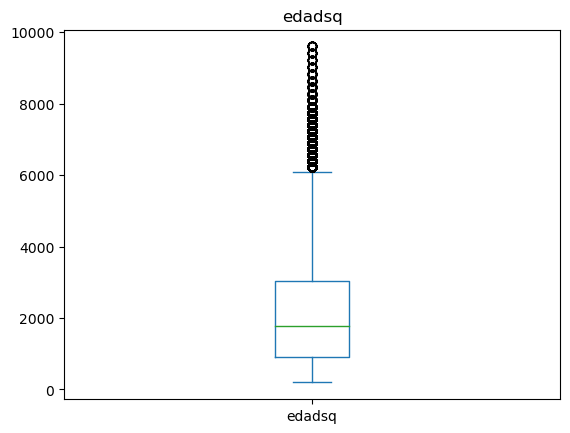

In [18]:
# box lpot
for var in list_quantitatives:
    data[var].plot(kind='box', title=var)
    plt.show()

### Reviewing the qualitative explanatory variables:

In [19]:
#filtering qualitative variables

# numeric variables
list_quantitatives = list(data.describe().columns)

#droping numeric variables 
list_qualitatives = data.drop(columns = list_quantitatives).columns
list_qualitatives

Index(['año', 'urbano', 'hombre', 'escolaridad', 'formal'], dtype='object')

In [20]:
data[list_qualitatives]

,año,urbano,hombre,escolaridad,formal
0,2018,Urbana,Mujer,[sup. univ. completa - posgrado],Formal
1,2018,Urbana,Hombre,[prim. completa - sec. incompleta],Informal
2,2018,Urbana,Mujer,[sup. univ. completa - posgrado],Formal
3,2018,Urbana,Hombre,[prim. completa - sec. incompleta],Informal
4,2018,Urbana,Mujer,[prim. completa - sec. incompleta],Informal
...,...,...,...,...,...
312716,2022,Rural,Mujer,[sin nivel - prim. incompleta],Informal
312717,2022,Rural,Mujer,[sin nivel - prim. incompleta],Informal
312718,2022,Rural,Hombre,[sec. completa - sup. no univ incompleta],Informal
312719,2022,Rural,Hombre,[prim. completa - sec. incompleta],Informal


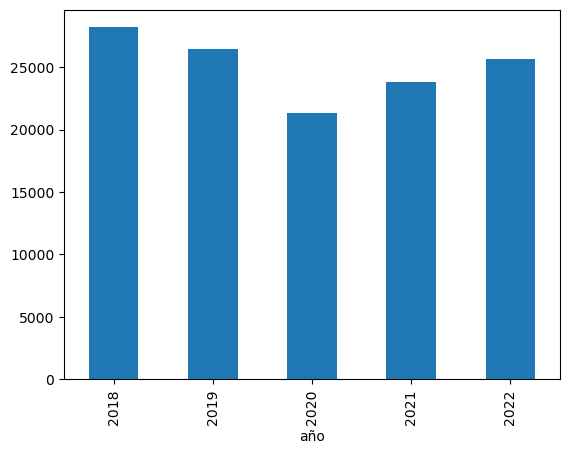

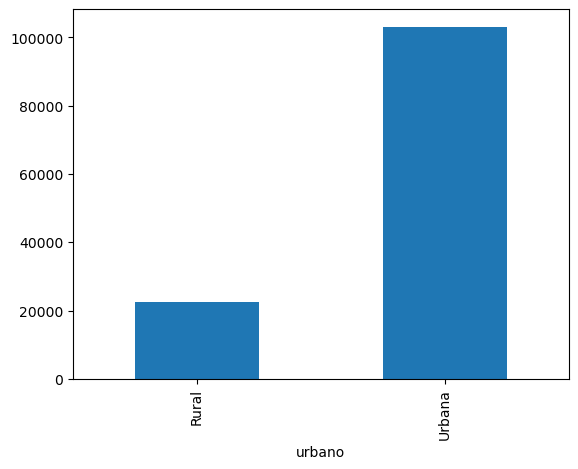

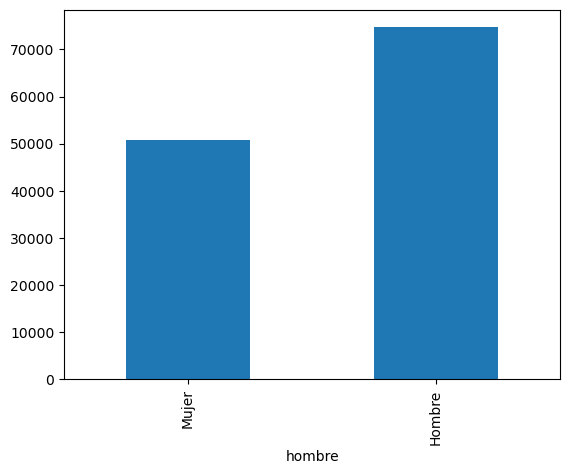

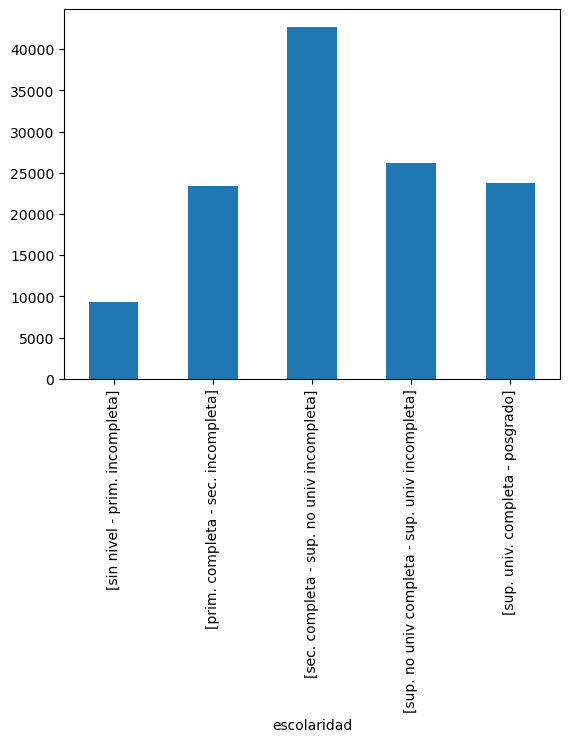

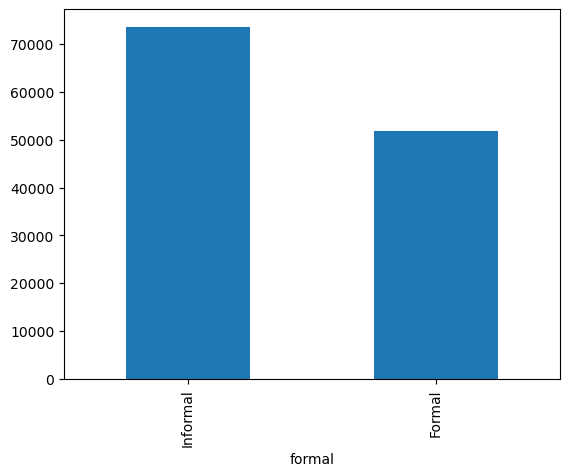

In [21]:
# frequency distribution of qual vars.
for var in list_qualitatives:
    data.groupby(var)['logsal'].count().plot.bar()
    plt.show()

### Target relation with numeric variables

In [22]:
#Droping nulls to create a database for correlation
base_cor= data.dropna(how='any')

In [23]:
base_cor

,año,horas,edad,salario,fac500a,urbano,hombre,escolaridad,formal,logsal,edadsq
1,2018,40.0,46,358.333333,78.765717,Urbana,Hombre,[prim. completa - sec. incompleta],Informal,5.881464,2116.0
2,2018,40.0,24,2087.000000,67.165054,Urbana,Mujer,[sup. univ. completa - posgrado],Formal,7.643483,576.0
6,2018,42.0,52,398.166667,61.869987,Urbana,Mujer,[prim. completa - sec. incompleta],Informal,5.986871,2704.0
7,2018,38.0,18,497.750000,67.165054,Urbana,Mujer,[sec. completa - sup. no univ incompleta],Informal,6.210098,324.0
8,2018,40.0,30,1192.583333,81.181396,Urbana,Mujer,[sup. univ. completa - posgrado],Formal,7.083877,900.0
...,...,...,...,...,...,...,...,...,...,...,...
312699,2022,8.0,42,280.666667,27.004974,Urbana,Mujer,[sec. completa - sup. no univ incompleta],Informal,5.637168,1764.0
312702,2022,48.0,32,1169.583333,33.928532,Urbana,Hombre,[sin nivel - prim. incompleta],Informal,7.064403,1024.0
312709,2022,42.0,46,562.916667,282.840057,Rural,Hombre,[sec. completa - sup. no univ incompleta],Informal,6.333132,2116.0
312714,2022,12.0,43,61.416667,219.526733,Rural,Mujer,[sec. completa - sup. no univ incompleta],Informal,4.117681,1849.0


In [24]:
d=['fac500a','salario',]
base_cor=base_cor.drop(d,axis=1)

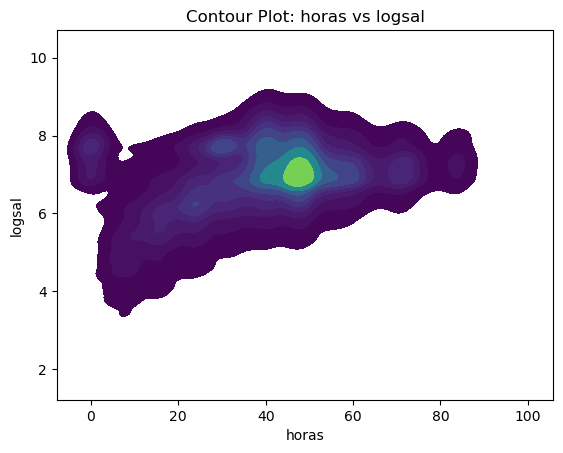

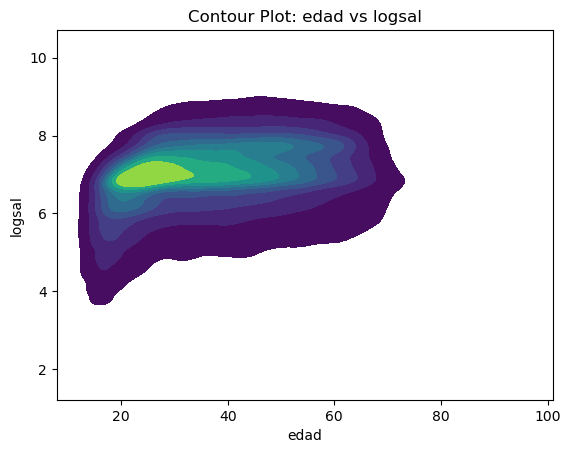

C:\Users\User\AppData\Local\Temp\ipykernel_6216\3613530657.py:9: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=pairplot_data, x=var, y='logsal', cmap='viridis', fill=True, thresh=0.05)


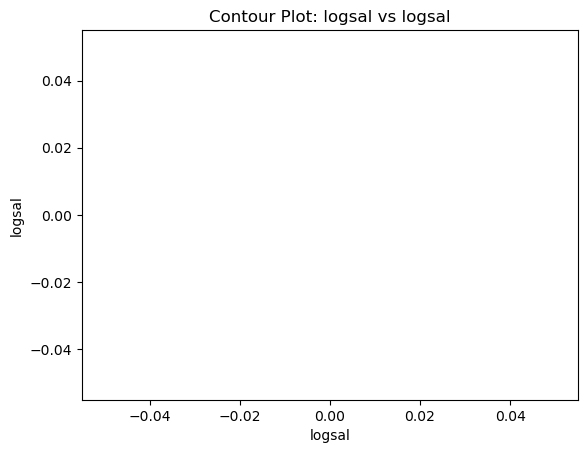

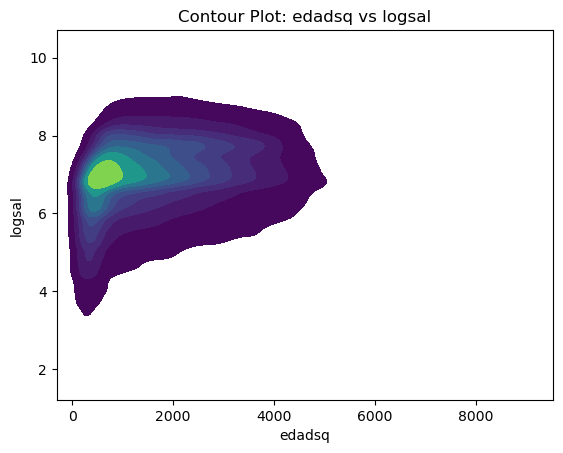

In [77]:
#Correlation
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

list_quantitatives = base_cor.describe().columns.tolist()
pairplot_data = base_cor[list_quantitatives]

for var in list_quantitatives:
    sns.kdeplot(data=pairplot_data, x=var, y='logsal', cmap='viridis', fill=True, thresh=0.05)
    plt.xlabel(var)
    plt.ylabel('logsal')
    plt.title(f'Contour Plot: {var} vs logsal')
    plt.show()

In [25]:
#Problem with droping columns
data=databk

### Relation between quantitative and qualitative variables 

Salary logarithm vs gender

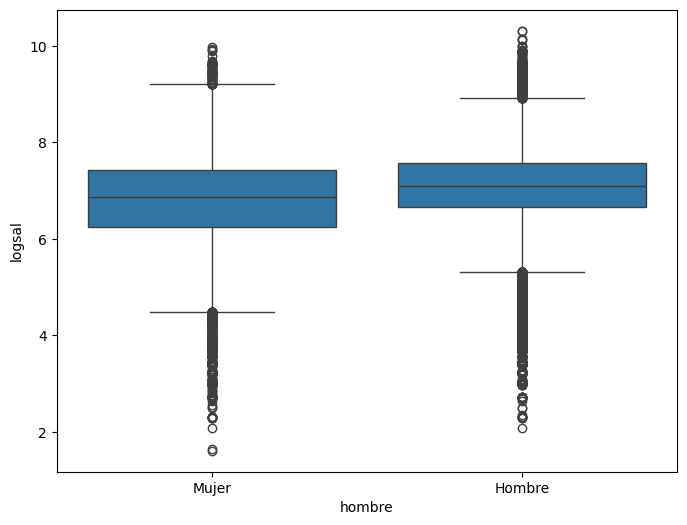

In [26]:
var = 'hombre'
datos = pd.concat([data['logsal'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="logsal", data=datos)
#fig.axis(ymin=0, ymax=800000)
plt.show()

Salary logarithm vs formal/informal job

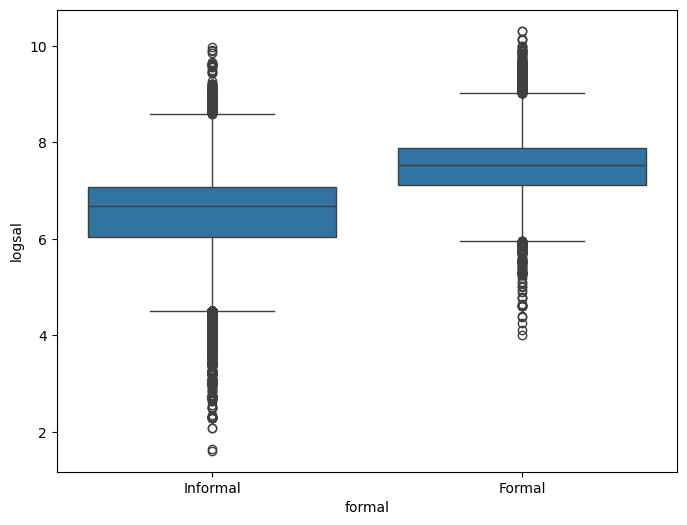

In [27]:
var = 'formal'
datos = pd.concat([data['logsal'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="logsal", data=datos)
#fig.axis(ymin=0, ymax=800000)
plt.show()

Education level vs logarithm salary

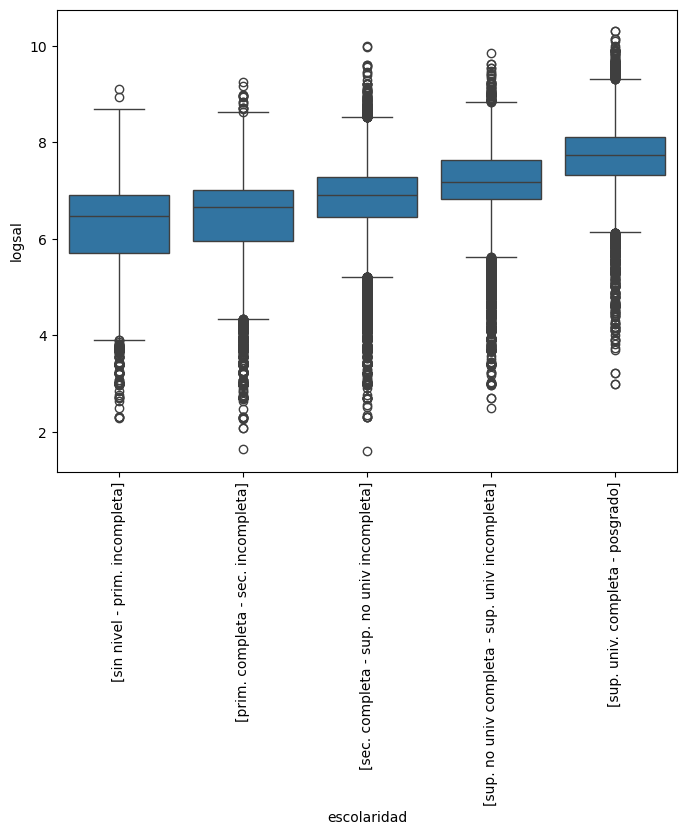

In [28]:
var = 'escolaridad'
datos = pd.concat([data['logsal'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="logsal", data=datos)
plt.xticks(rotation=90)
#fig.axis(ymin=0, ymax=800000)
plt.show()

There are considerable relations between these variables

### Relation between qualitative variables

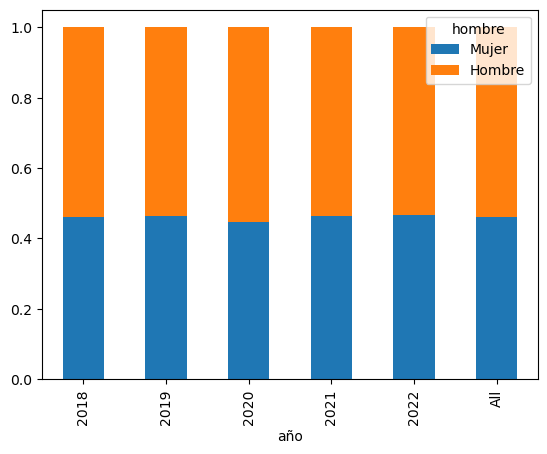

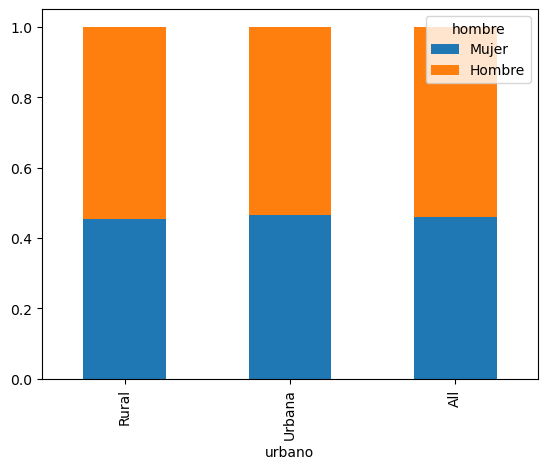

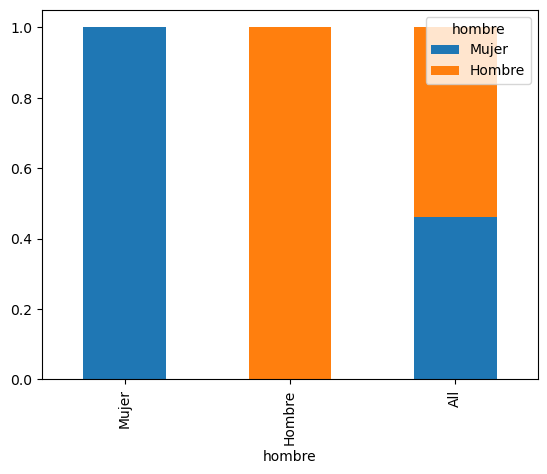

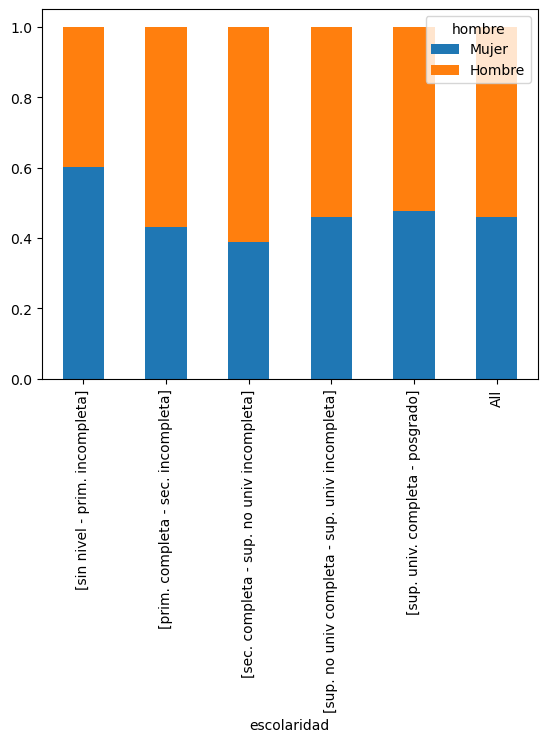

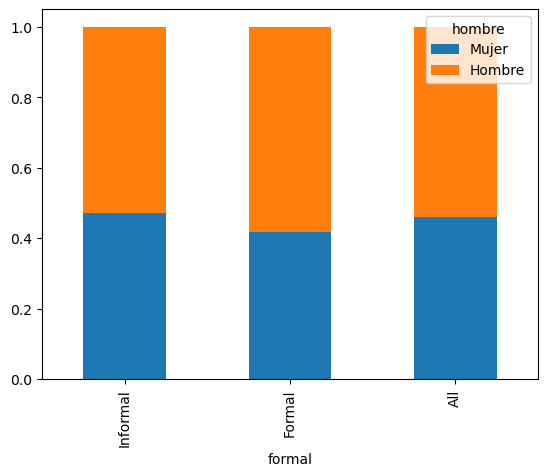

In [29]:
for var in list_qualitatives:
    cross = pd.crosstab(data[var],data['hombre'],margins = True,normalize = 'index')
    cross.plot.bar(stacked = True)
    plt.show()

There are no big differences showed in previus graphs. Maybe just in education level among genders

In [43]:
tabla = data.groupby(['escolaridad', 'hombre']).size().unstack(fill_value=0)
print(tabla)

hombre                                          Mujer  Hombre
escolaridad                                                  
[sin nivel - prim. incompleta]                  37165   24622
[prim. completa - sec. incompleta]              36490   48252
[sec. completa - sup. no univ incompleta]       35686   55964
[sup. no univ completa - sup. univ incompleta]  19759   23222
[sup. univ. completa - posgrado]                15050   16511


In [38]:
tabla['agrupacion'] = ['Educación Básica Regular' if idx < 3 else 'Educación Superior' for idx in range(len(tabla))]

# Agrupar por 'agrupacion' y sumar los valores de 'hombre' y 'mujer'
tabla_nueva = tabla.groupby('agrupacion').sum()

# Imprimir la tabla resultante
print(tabla_nueva)

hombre                     Mujer  Hombre
agrupacion                              
Educación Básica Regular  109341  128838
Educación Superior         34809   39733


There are more man with high education than women in the survey

## 4. Handling nulls and outliers

### 4.1 Missings

In [51]:
import missingno as msno

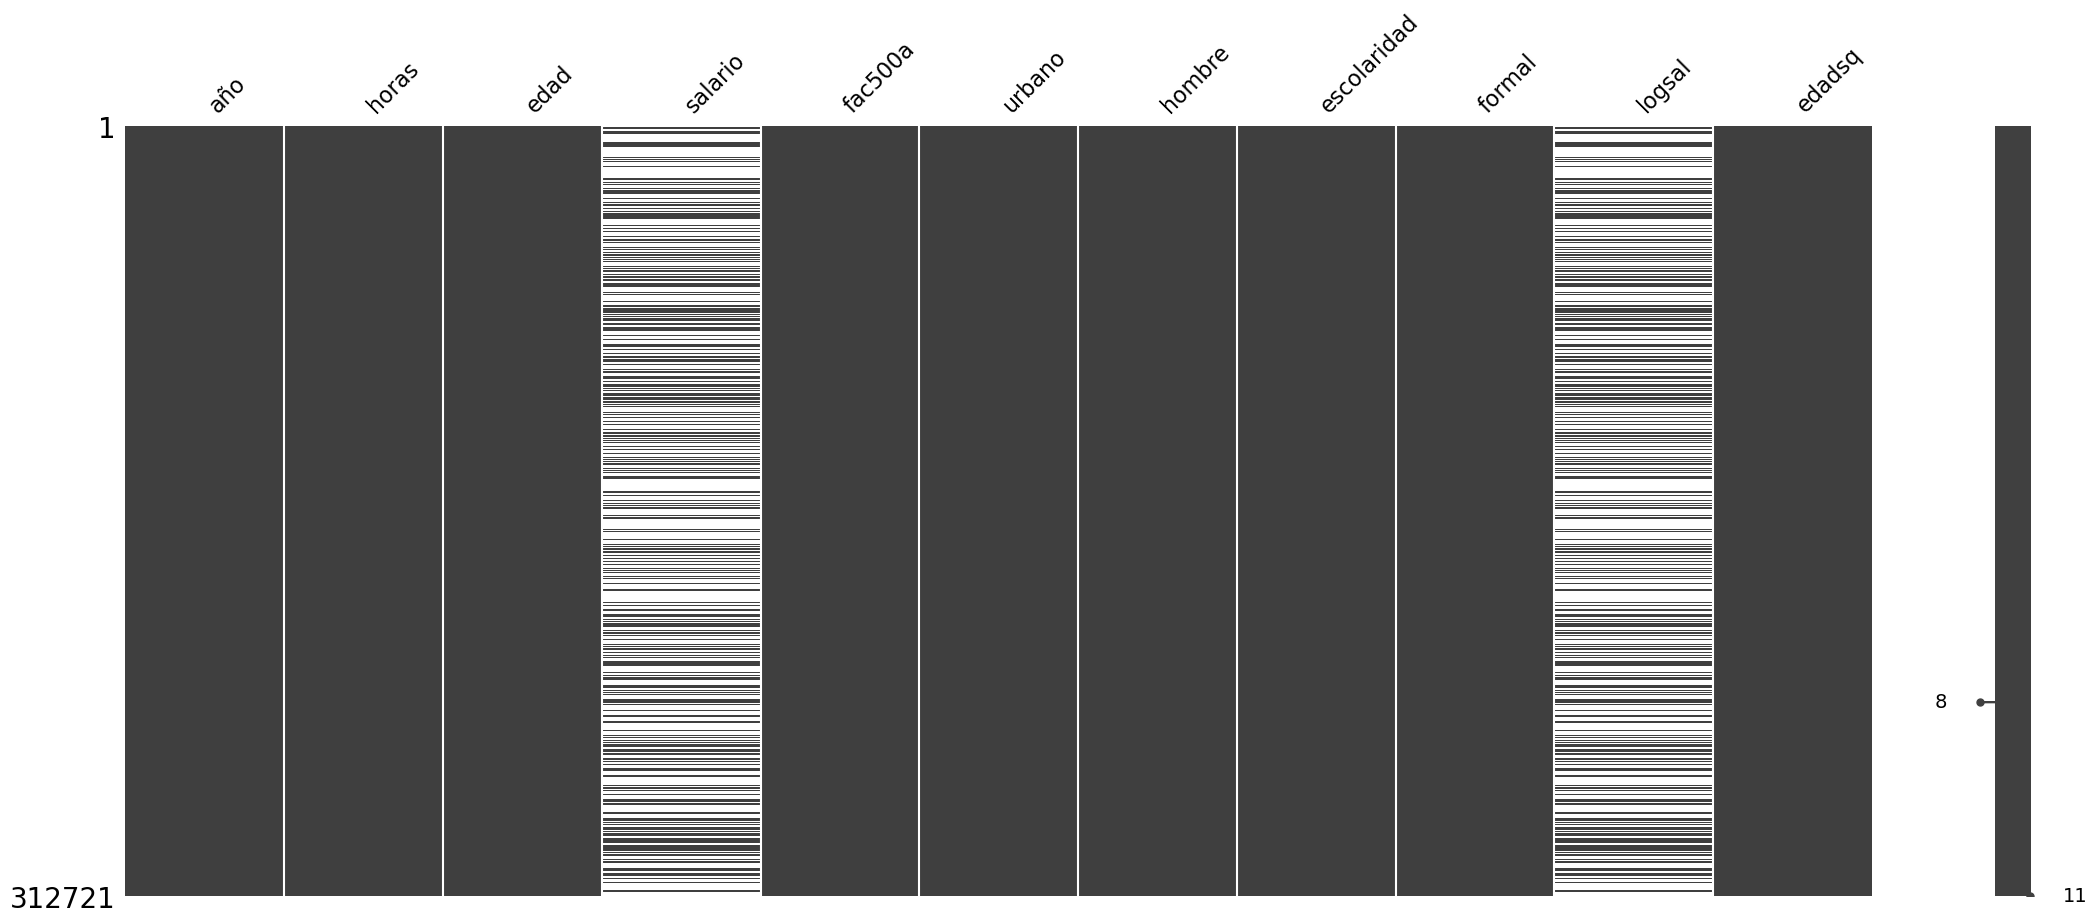

In [52]:
msno.matrix(data)
plt.show()

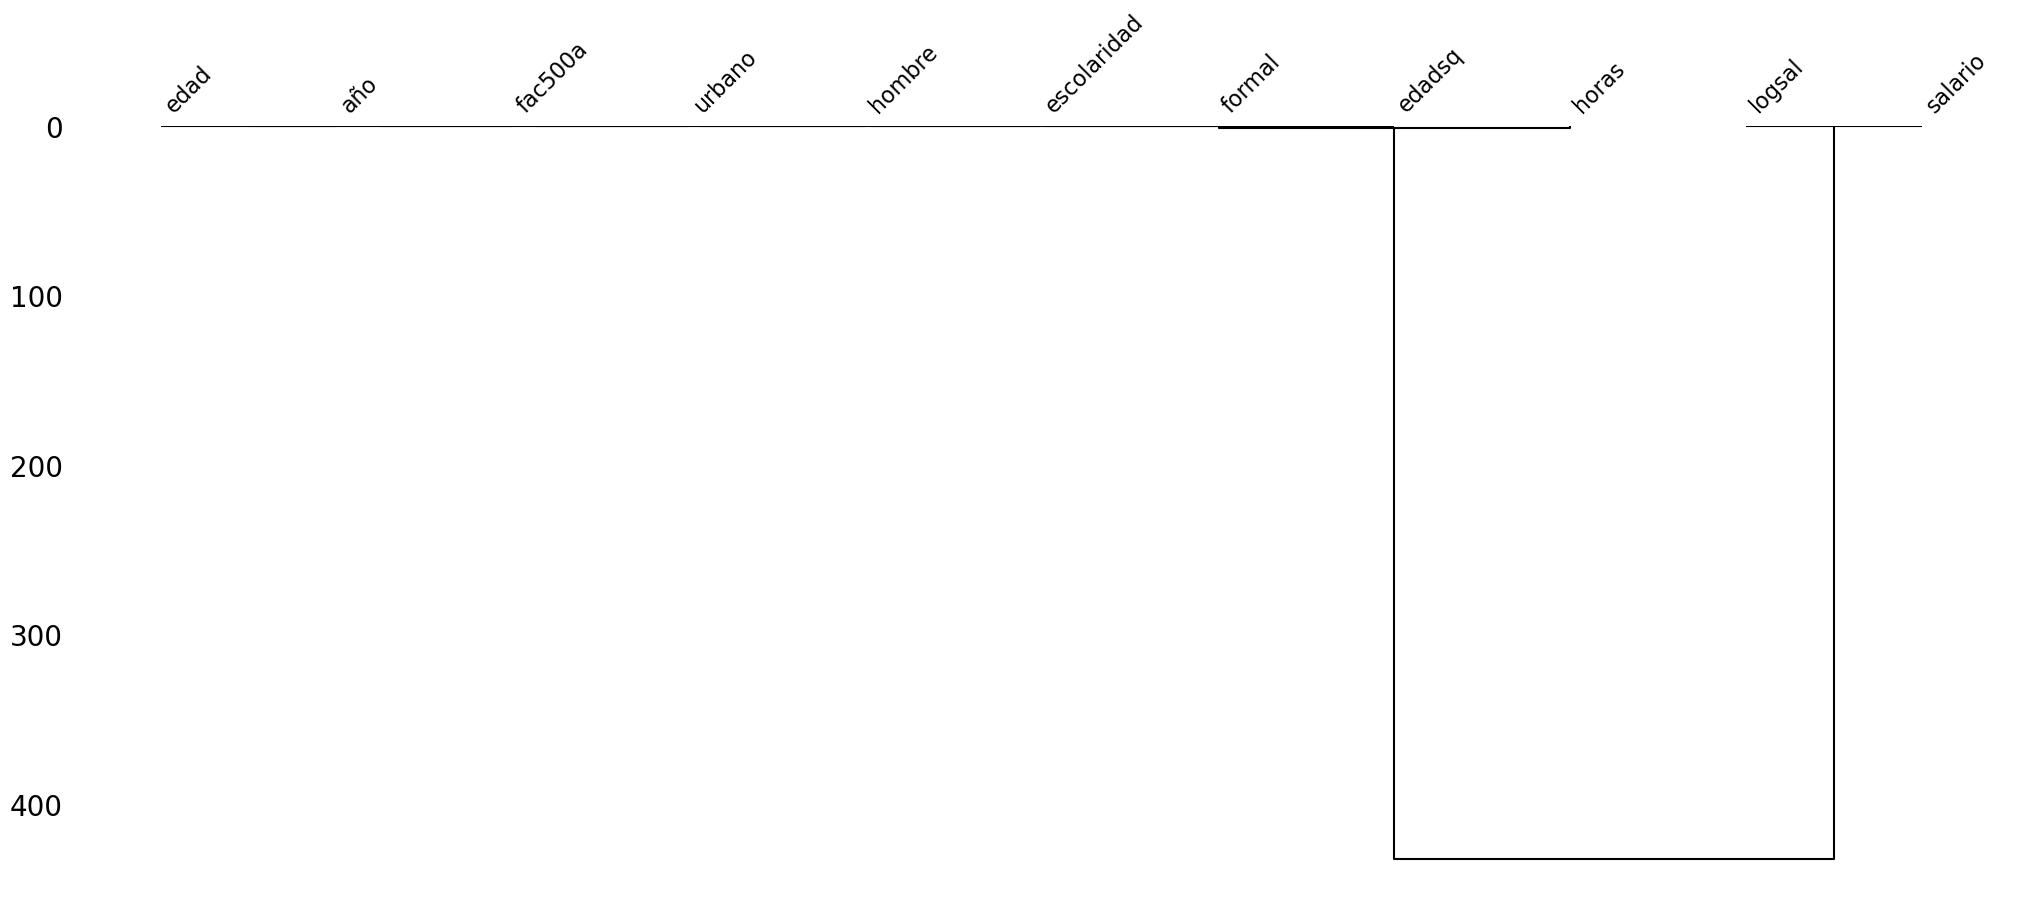

In [53]:
msno.dendrogram(data)
plt.show()

The two previous graphs show that the problem of null values is exclusively in the dependent variable. So it's possible to ignore it

In [54]:
data.isnull().sum()

año                 0
horas               2
edad                0
salario        187316
fac500a             0
urbano              0
hombre              0
escolaridad         0
formal              0
logsal         187316
edadsq              0
dtype: int64

### Treatment

For explanatory variables there are no problems dropping the just two nulls in `horas` 

In the case of the target we can review the balance around the years (2017-2021)

In [55]:
data_2018=datasets['data_2018']
data_2019=datasets['data_2019']
data_2020=datasets['data_2020']
data_2021=datasets['data_2021']
data_2022=datasets['data_2022']

In [56]:
years = range(2018, 2023)

for year in years:
    dataset_name = f"data_{year}"
    null_count = globals()[dataset_name]['logsal'].isnull().sum()
    total_count = globals()[dataset_name]['año'].count()
    valid_count=total_count-null_count
    n1=(null_count/total_count)*100
    v1=(valid_count/total_count)*100
    print(f"Year {year}:")
    print(f"Nulls: {null_count}")
    print(f"Non nulls: {valid_count}")
    print(f"Total: {total_count}")
    print(f"Useful Data: {v1:.2f}%")
    print("-------------------")

Year 2018:
Nulls: 41837
Non nulls: 28199
Total: 70036
Useful Data: 40.26%
-------------------
Year 2019:
Nulls: 38510
Non nulls: 26444
Total: 64954
Useful Data: 40.71%
-------------------
Year 2020:
Nulls: 35274
Non nulls: 21341
Total: 56615
Useful Data: 37.69%
-------------------
Year 2021:
Nulls: 36154
Non nulls: 23781
Total: 59935
Useful Data: 39.68%
-------------------
Year 2022:
Nulls: 35541
Non nulls: 25640
Total: 61181
Useful Data: 41.91%
-------------------


As the missing data is balanced between all years. The practical solution here will be dropping all na's.

**This changes will be applied before estimation in x and y arrays**

### 4.2 Outliers

In [57]:
data.describe()

,horas,edad,salario,fac500a,logsal,edadsq
count,312719.000000,312721.000000,125405.000000,312721.000000,125405.000000,312721.000000
mean,37.196665,43.001113,1449.387230,270.849823,6.920331,2124.887939
std,19.750701,16.591275,1341.031085,287.811218,0.929751,1526.846558
min,0.000000,14.000000,5.000000,0.182651,1.609438,196.000000
25%,22.000000,30.000000,654.250000,93.664726,6.483490,900.000000
50%,38.000000,42.000000,1095.416667,182.056427,6.998890,1764.000000
75%,48.000000,55.000000,1824.169271,332.263641,7.508880,3025.000000
max,98.000000,98.000000,30085.416667,3173.393799,10.311796,9604.000000


In [58]:
data.describe(percentiles = [0.01, 0.025, 0.05, 0.1, 0.5, 0.75])

,horas,edad,salario,fac500a,logsal,edadsq
count,312719.000000,312721.000000,125405.000000,312721.000000,125405.000000,312721.000000
mean,37.196665,43.001113,1449.387230,270.849823,6.920331,2124.887939
std,19.750701,16.591275,1341.031085,287.811218,0.929751,1526.846558
min,0.000000,14.000000,5.000000,0.182651,1.609438,196.000000
1%,0.000000,14.000000,59.416667,3.932337,4.084575,196.000000
2.5%,2.000000,16.000000,100.500000,9.716125,4.610157,256.000000
5%,6.000000,18.000000,172.833333,24.316105,5.152328,324.000000
10%,12.000000,21.000000,300.916667,46.664833,5.706833,441.000000
50%,38.000000,42.000000,1095.416667,182.056427,6.998890,1764.000000
75%,48.000000,55.000000,1824.169271,332.263641,7.508880,3025.000000


**Variable `logsal`**

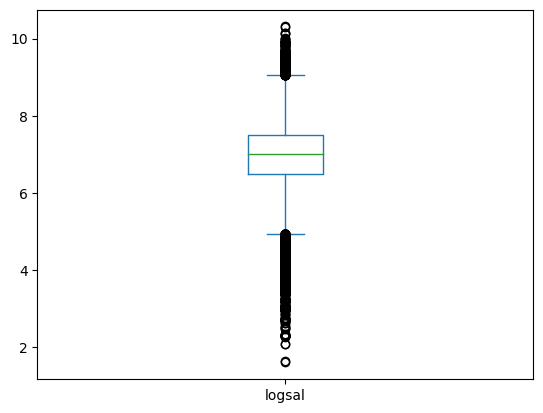

In [59]:
data['logsal'].plot(kind='box')
plt.show()

Creating a function for outlier detection

In [60]:
def find_anomalies(data):
    anomalies = []
    # Set upper and lower limit to 3 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 3   # You can change this
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

In [61]:
anomalos = find_anomalies(data[['logsal']])
a=len(anomalos)
print(f'There are {a} anomalies')

4.1310773
9.709585
There are 1605 anomalies


In [62]:
data.loc[anomalos]

,año,horas,edad,salario,fac500a,urbano,hombre,escolaridad,formal,logsal,edadsq
207,2018,8.0,16,60.916667,142.600266,Urbana,Hombre,[prim. completa - sec. incompleta],Informal,4.109507,256.0
312,2018,24.0,81,49.666667,136.339935,Urbana,Hombre,[sin nivel - prim. incompleta],Informal,3.905334,6561.0
348,2018,16.0,19,39.750000,154.116165,Urbana,Mujer,[sec. completa - sup. no univ incompleta],Informal,3.682610,361.0
513,2018,7.0,14,59.750000,328.282684,Urbana,Hombre,[prim. completa - sec. incompleta],Informal,4.090169,196.0
516,2018,7.0,46,59.750000,283.105896,Urbana,Mujer,[sin nivel - prim. incompleta],Informal,4.090169,2116.0
...,...,...,...,...,...,...,...,...,...,...,...
312546,2022,4.0,17,19.250000,23.690615,Urbana,Mujer,[prim. completa - sec. incompleta],Informal,2.957511,289.0
312568,2022,9.0,30,58.250000,328.955658,Urbana,Hombre,[sec. completa - sup. no univ incompleta],Informal,4.064744,900.0
312617,2022,4.0,73,58.083333,71.274330,Urbana,Hombre,[sin nivel - prim. incompleta],Informal,4.061879,5329.0
312714,2022,12.0,43,61.416667,219.526733,Rural,Mujer,[sec. completa - sup. no univ incompleta],Informal,4.117681,1849.0


In [63]:
data_limpia=data.drop(anomalos)

Verifying

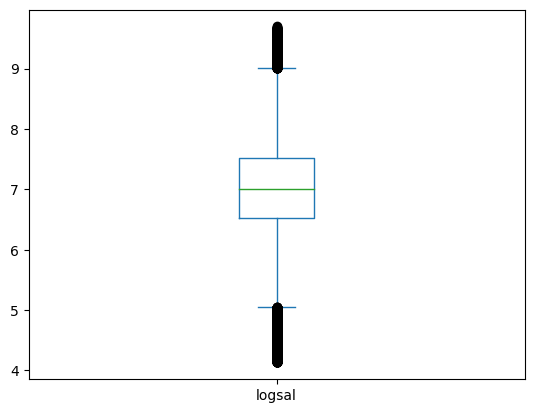

In [64]:
data_limpia['logsal'].plot(kind='box')
plt.show()

It's better

## 5. Qualitative and Quantitative Associations

It's time to use other tools to evidence relationship between target and the other variables

In [ ]:
data_limpia=data_limpia.drop('salario',axis=1)

#### Correlation map

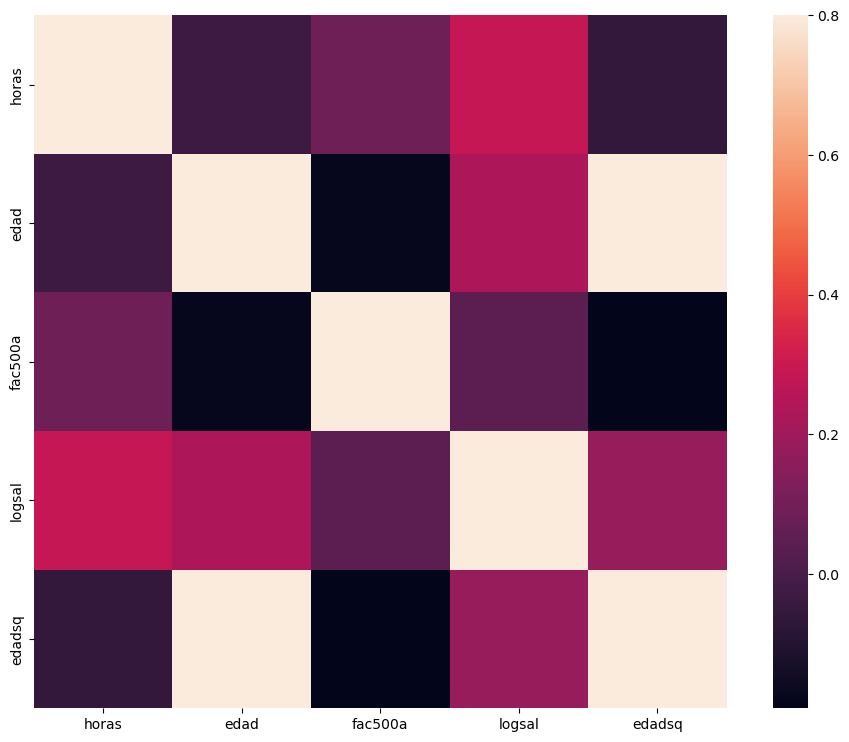

In [86]:
corrmat = data_limpia.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

There is no problem between dependent variables because the variable #fac500a is just the expansion factor of the survey. And the exact correlation between age variables it's because edadsq=edad^2

Target correlation map

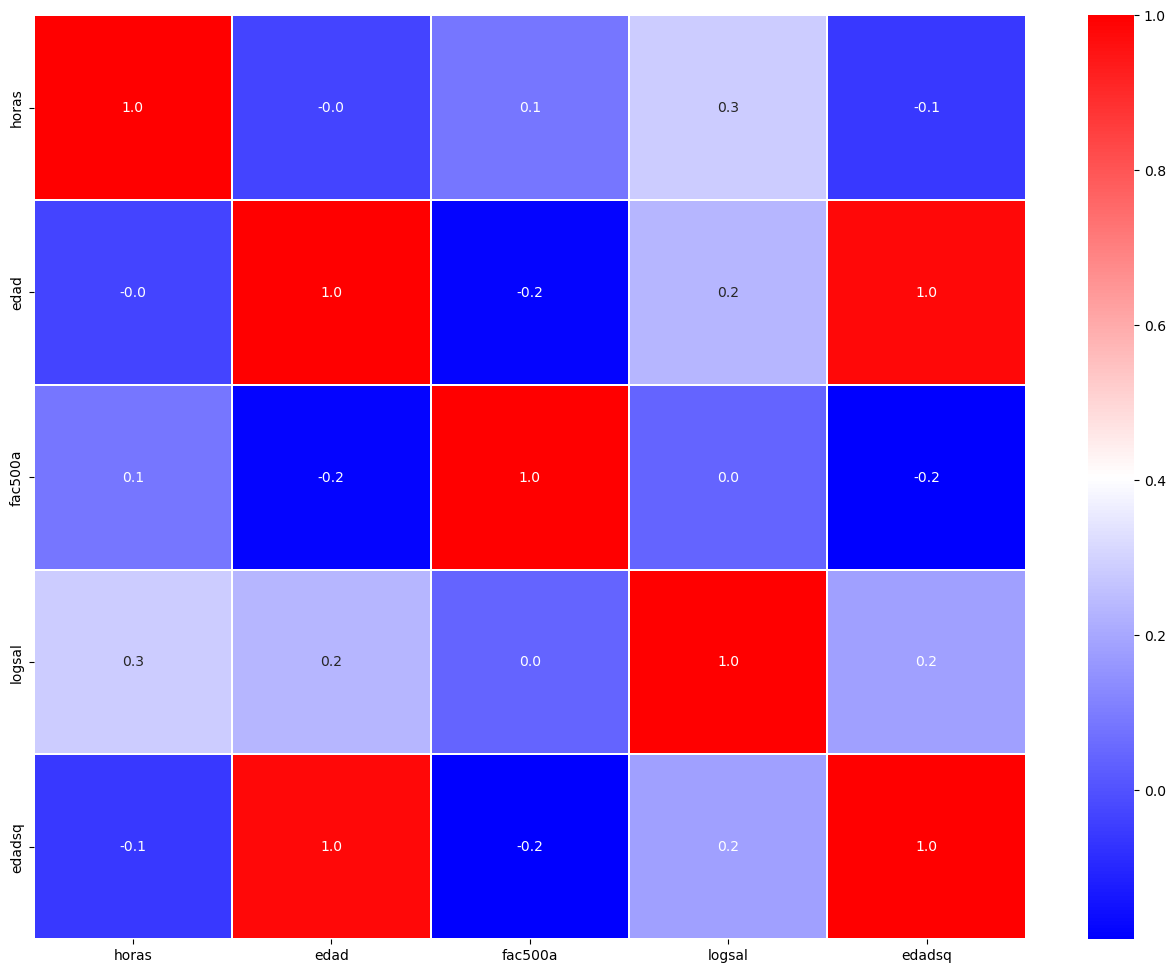

In [87]:
fig = plt.figure(figsize=(16,12)) 
sns.heatmap(corrmat,annot=corrmat,fmt='.1f',linewidth=0.2,cmap='bwr')
plt.show()

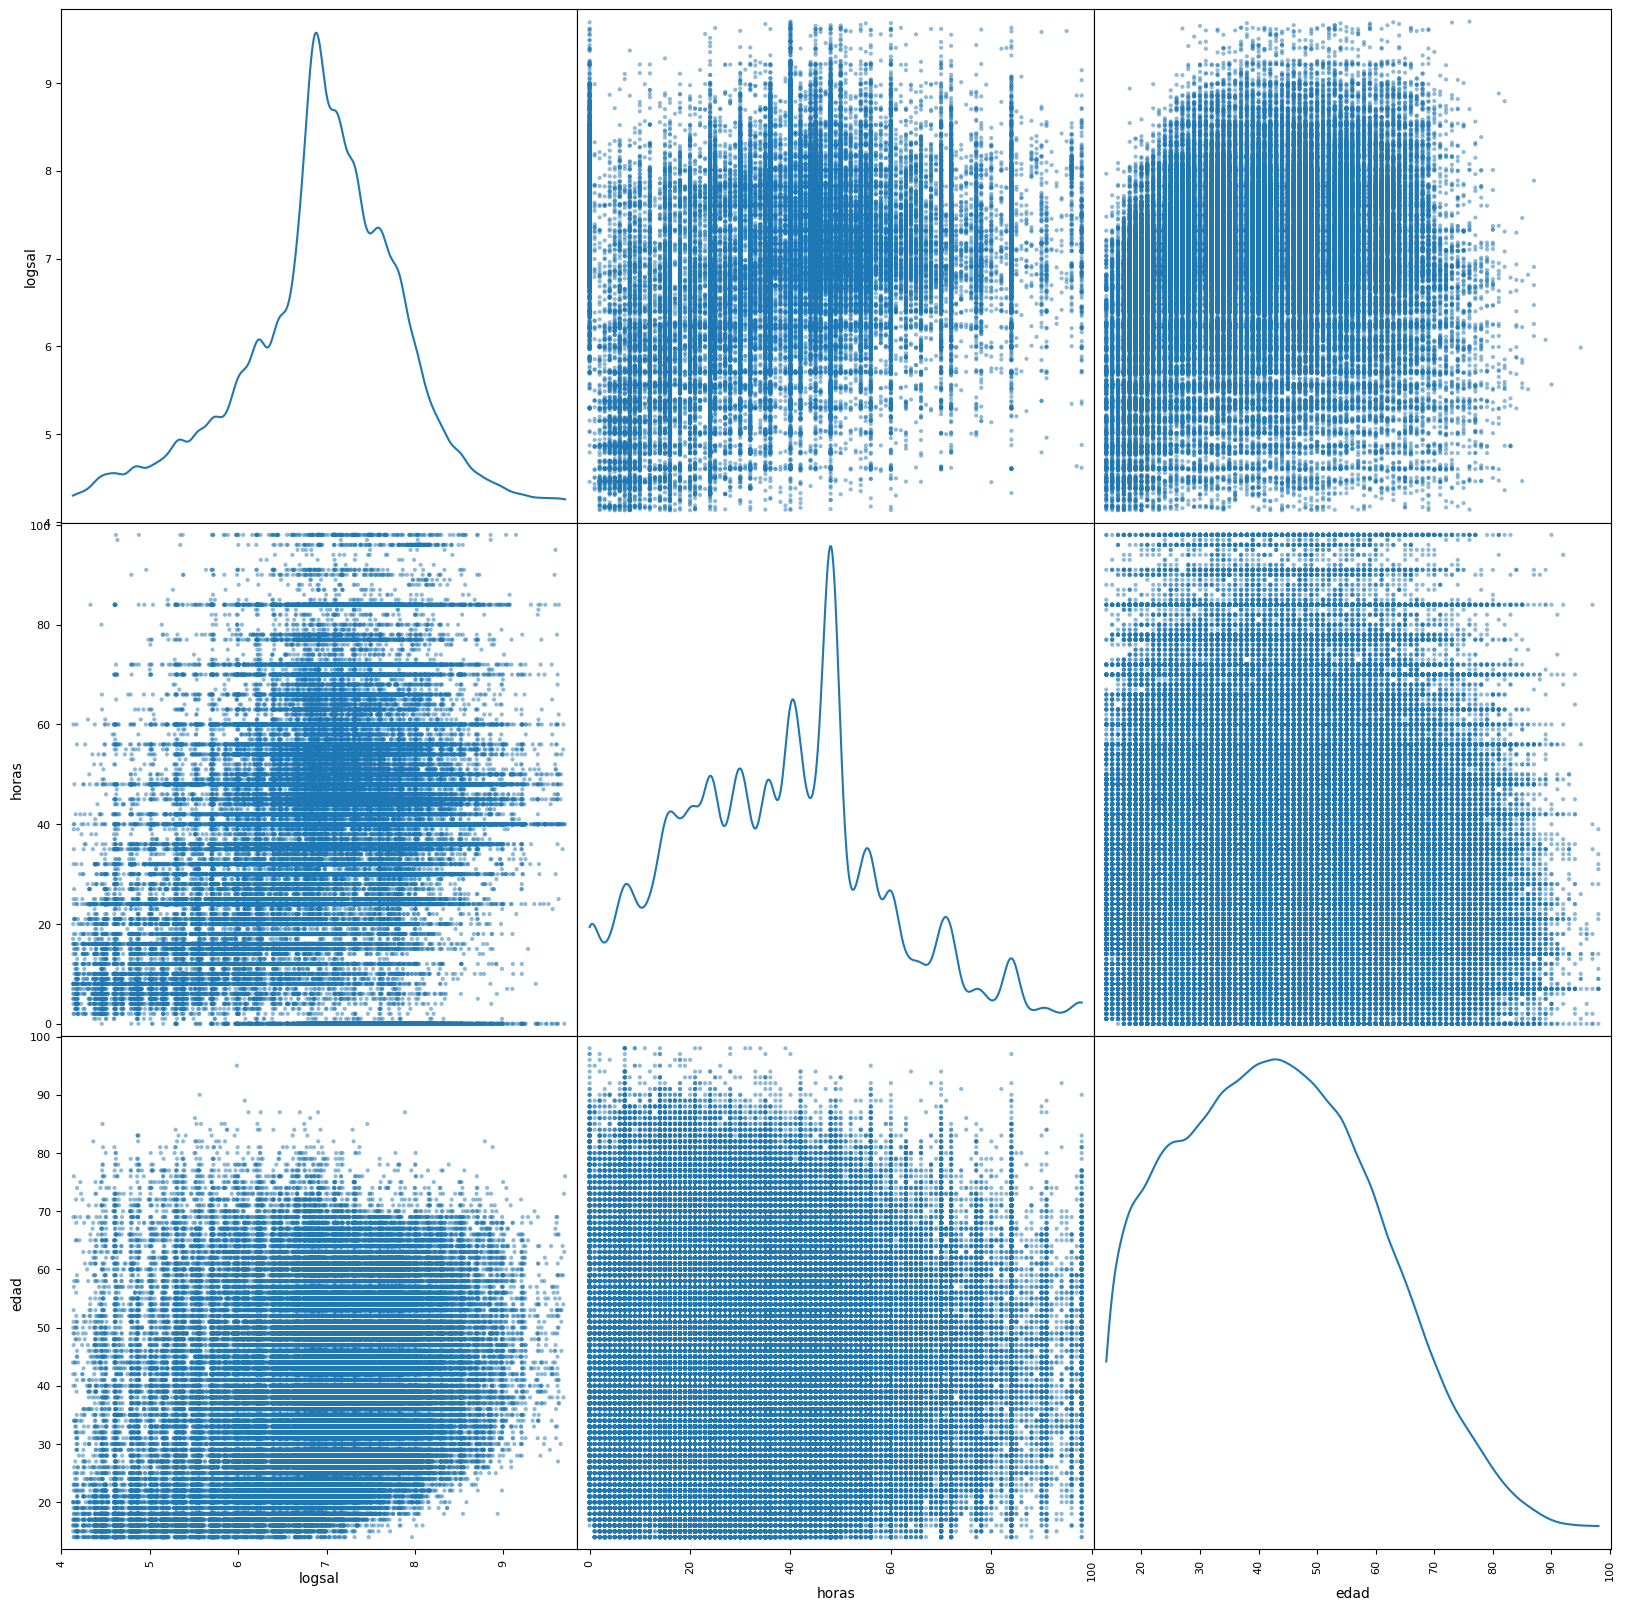

In [89]:
cols = ['logsal', 'horas', 'edad']
pd.plotting.scatter_matrix(data_limpia[cols], diagonal='kde', figsize = (20,20))
plt.show()

There is no sense trying to view numeric correlation between non-numeric dependent variables and target.

## 6. Modelling

Creating dummies for non-numeric variables

In [90]:
mapeo_hombre={'Hombre':1 , 'Mujer':0}
mapeo_formal={'Formal':1 , 'Informal':0}
mapeo_urbano={'Urbana':1 , 'Rural':0}
mapeo_escolaridad={'[sin nivel - prim. incompleta]': 0, '[prim. completa - sec. incompleta]':1, '[sec. completa - sup. no univ incompleta]': 2,'[sup. no univ completa - sup. univ incompleta]':3, '[sup. univ. completa - posgrado]':4}

In [91]:
data_reg=data_limpia

In [92]:
data_reg['hombre'] = data_limpia['hombre'].replace(mapeo_hombre)
data_reg['formal'] = data_limpia['formal'].replace(mapeo_formal)
data_reg['urbano'] = data_limpia['urbano'].replace(mapeo_urbano)
data_reg['escolaridad'] = data_limpia['escolaridad'].replace(mapeo_escolaridad)

In [93]:
data_reg

,año,horas,edad,fac500a,urbano,hombre,escolaridad,formal,logsal,edadsq
0,2018,30.0,29,81.181396,1,0,4,1,NaN,841.0
1,2018,40.0,46,78.765717,1,1,1,0,5.881464,2116.0
2,2018,40.0,24,67.165054,1,0,4,1,7.643483,576.0
3,2018,56.0,60,78.765717,1,1,1,0,NaN,3600.0
4,2018,49.0,57,61.869987,1,0,1,0,NaN,3249.0
...,...,...,...,...,...,...,...,...,...,...
312716,2022,56.0,57,172.185242,0,0,0,0,NaN,3249.0
312717,2022,56.0,67,166.270905,0,0,0,0,NaN,4489.0
312718,2022,63.0,77,146.465637,0,1,2,0,NaN,5929.0
312719,2022,70.0,70,172.900574,0,1,1,0,NaN,4900.0


In [94]:
data_reg['intercept']=1

In [95]:
# Dictionaries
x_arrays = {}
y_vectors = {}
weights_vectors= {}

data_reg['año'] = data_reg['año'].astype(int)

# Iteration between 2018 and 2022
for year in range(2018, 2023):
    # Filter
    filtered_data = data_reg[data_reg['año'] == year]
    
    # X
    x_arrays[f'x_{year}'] = filtered_data[['intercept', 'horas', 'edad', 'edadsq', 'hombre', 'urbano', 'formal', 'escolaridad']]
    
    # Y
    y_vectors[f'y_{year}'] = filtered_data['logsal']
    
    # Weights
    weights_vectors[f'weights_{year}']=filtered_data['fac500a']

In [96]:
x_arrays['x_2018']

,intercept,horas,edad,edadsq,hombre,urbano,formal,escolaridad
0,1,30.0,29,841.0,0,1,1,4
1,1,40.0,46,2116.0,1,1,0,1
2,1,40.0,24,576.0,0,1,1,4
3,1,56.0,60,3600.0,1,1,0,1
4,1,49.0,57,3249.0,0,1,0,1
...,...,...,...,...,...,...,...,...
70031,1,30.0,18,324.0,0,0,0,1
70032,1,8.0,49,2401.0,1,0,0,1
70033,1,16.0,50,2500.0,0,0,0,0
70034,1,43.0,25,625.0,1,0,1,4


In [97]:
x_2018=x_arrays['x_2018']
x_2019=x_arrays['x_2019']
x_2020=x_arrays['x_2020']
x_2021=x_arrays['x_2021']
x_2022=x_arrays['x_2022']

In [98]:
y_2018=y_vectors['y_2018']
y_2019=y_vectors['y_2019']
y_2020=y_vectors['y_2020']
y_2021=y_vectors['y_2021']
y_2022=y_vectors['y_2022']

In [99]:
weights_2018=weights_vectors['weights_2018']
weights_2019=weights_vectors['weights_2019']
weights_2020=weights_vectors['weights_2020']
weights_2021=weights_vectors['weights_2021']
weights_2022=weights_vectors['weights_2022']

### Applying the treatment for null data

In [100]:
def clean_data(x, y, weights):
    missing_x = x.isnull().sum()
    missing_y = y.isnull().sum()
    x = x.dropna()
    y = y.loc[x.index]
    weights = weights.loc[x.index]
    y = y.dropna()
    x = x.loc[y.index]
    weights = weights.loc[y.index]
    return x, y, weights

In [101]:
data_x = {
    2018: x_2018,
    2019: x_2019,
    2020: x_2020,
    2021: x_2021,
    2022: x_2022
}

In [102]:
data_y = {
    2018: y_2018,
    2019: y_2019,
    2020: y_2020,
    2021: y_2021,
    2022: y_2022
}

In [103]:
data_weights = {
    2018: weights_2018,
    2019: weights_2019,
    2020: weights_2020,
    2021: weights_2021,
    2022: weights_2022
}

In [104]:
cleaned_data = {}

In [105]:
for year in range(2018, 2023):
    cleaned_data[year] = clean_data(data_x[year], data_y[year], data_weights[year])

In [106]:
x_2018_clean, y_2018_clean, weights_2018_clean = cleaned_data[2018]

In [107]:
x_2019_clean, y_2019_clean, weights_2019_clean = cleaned_data[2019]

In [108]:
x_2020_clean, y_2020_clean, weights_2020_clean = cleaned_data[2020]

In [109]:
x_2021_clean, y_2021_clean, weights_2021_clean = cleaned_data[2021]

In [110]:
x_2022_clean, y_2022_clean, weights_2022_clean = cleaned_data[2022]

In [111]:
y_2018_clean

1        5.881464
2        7.643483
6        5.986871
7        6.210098
8        7.083877
           ...   
70001    7.310216
70003    7.821042
70014    7.087086
70017    7.056822
70023    6.652110
Name: logsal, Length: 27783, dtype: float32

In [112]:
x_2018_clean.shape, y_2018_clean.shape, weights_2018_clean.shape

((27783, 8), (27783,), (27783,))

#### Adjusting dimensions

In [113]:
import numpy as np

y_2018_clean_reshaped = y_2018_clean.values.reshape(-1, 1)
y_2019_clean_reshaped = y_2019_clean.values.reshape(-1, 1)
y_2020_clean_reshaped = y_2020_clean.values.reshape(-1, 1)
y_2021_clean_reshaped = y_2021_clean.values.reshape(-1, 1)
y_2022_clean_reshaped = y_2022_clean.values.reshape(-1, 1)

weights_2018_clean_reshaped = weights_2018_clean.values.reshape(-1, 1)
weights_2019_clean_reshaped = weights_2019_clean.values.reshape(-1, 1)
weights_2020_clean_reshaped = weights_2020_clean.values.reshape(-1, 1)
weights_2021_clean_reshaped = weights_2021_clean.values.reshape(-1, 1)
weights_2022_clean_reshaped = weights_2022_clean.values.reshape(-1, 1)

In [114]:
x_2018_clean.shape, y_2018_clean_reshaped.shape, weights_2018_clean_reshaped.shape

((27783, 8), (27783, 1), (27783, 1))

#### Final corrections

In [115]:
#Dummies for x

transformed_data = {}

for year, x_data in zip(range(2018, 2023), [x_2018_clean, x_2019_clean, x_2020_clean, x_2021_clean, x_2022_clean]):
    transformed_x = pd.get_dummies(x_data, columns=['hombre', 'urbano', 'formal', 'escolaridad'], drop_first=True)
    transformed_data[year] = transformed_x

In [116]:
# x
x_2018=transformed_data[2018]
x_2019=transformed_data[2019]
x_2020=transformed_data[2020]
x_2021=transformed_data[2021]
x_2022=transformed_data[2022]

# y
y_2018=y_2018_clean_reshaped
y_2019=y_2019_clean_reshaped
y_2020=y_2020_clean_reshaped
y_2021=y_2021_clean_reshaped
y_2022=y_2022_clean_reshaped

#weights
weights_2018=weights_2018_clean_reshaped
weights_2019=weights_2019_clean_reshaped
weights_2020=weights_2020_clean_reshaped
weights_2021=weights_2021_clean_reshaped
weights_2022=weights_2022_clean_reshaped

In [117]:
x_2018.shape, y_2018.shape, weights_2018.shape

((27783, 11), (27783, 1), (27783, 1))

### Quantile regression

Let's try with 2022

#### Without weights

In [107]:
import statsmodels.api as sm
import pandas as pd

quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Reg with each quantile
quant_reg_models = {}
for quantile in quantiles:
    model = sm.QuantReg(y_2022, x_2022).fit(q=quantile)
    quant_reg_models[quantile] = model

# Print all results
for quantile, model in quant_reg_models.items():
    print(f"Resultados para el percentil {quantile}:")
    print(model.summary())

Resultados para el percentil 0.1:
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3712
Model:                       QuantReg   Bandwidth:                     0.07708
Method:                 Least Squares   Sparsity:                        3.723
Date:                Tue, 19 Dec 2023   No. Observations:                25410
Time:                        11:28:34   Df Residuals:                    25399
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         3.2871      0.066     49.718      0.000       3.157       3.417
horas             0.0164      0.001     31.813      0.000       0.015       0.017
edad              0.0606      0.003     20.967      0.000       0.055       0.066
eda

#### Weights included

In [108]:
import statsmodels.api as sm
import pandas as pd

quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
quant_reg_models = {}

# Weights inclusion
for quantile in quantiles:
    model = sm.QuantReg(y_2022, x_2022).fit(q=quantile, weights=weights_2022)
    quant_reg_models[quantile] = model

# Results
for quantile, model in quant_reg_models.items():
    print(f"Resultados para el percentil {quantile}:")
    print(model.summary())

Resultados para el percentil 0.1:
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3712
Model:                       QuantReg   Bandwidth:                     0.07708
Method:                 Least Squares   Sparsity:                        3.723
Date:                Tue, 19 Dec 2023   No. Observations:                25410
Time:                        11:29:18   Df Residuals:                    25399
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         3.2871      0.066     49.718      0.000       3.157       3.417
horas             0.0164      0.001     31.813      0.000       0.015       0.017
edad              0.0606      0.003     20.967      0.000       0.055       0.066
eda

Due our non-numeric variables it's difficult to create an algorithm that do variables combinations without shows convergence problems. So we'll try with some selected combinations

Base model:

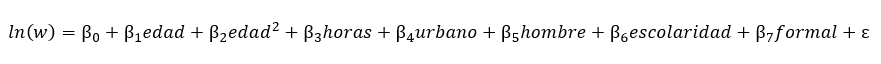

Let's start bolding variables that will be used always

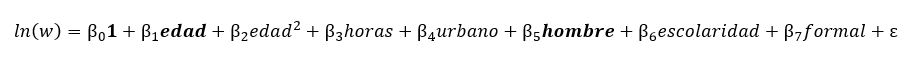

So, some models can be:
* <b>Without dummies</b>
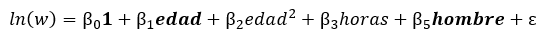
* <b>Without squared age</b>
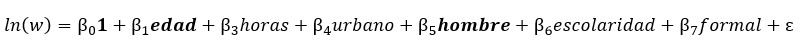
* <b>Without employer influence</b>
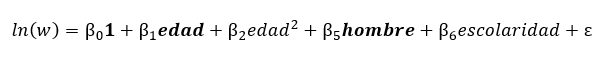
* <b>Other 1</b>
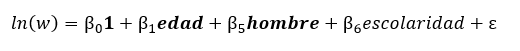
* <b>Other 2</b>
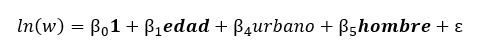
* <b>Other 3</b>
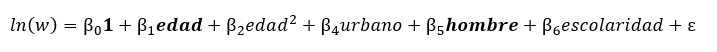

In [110]:
x_2022.columns

Index(['intercept', 'horas', 'edad', 'edadsq', 'hombre_1', 'urbano_1',
       'formal_1', 'escolaridad_1', 'escolaridad_2', 'escolaridad_3',
       'escolaridad_4'],
      dtype='object')

In [111]:
x_2022_1=x_2022
x_2022_2=x_2022[['intercept','edad','edadsq','horas','hombre_1']]
x_2022_3=x_2022[['intercept','edad','horas','urbano_1','hombre_1','escolaridad_1', 'escolaridad_2', 'escolaridad_3',
       'escolaridad_4','formal_1']]
x_2022_4=x_2022[['intercept','edad','edadsq','hombre_1','escolaridad_1', 'escolaridad_2', 'escolaridad_3',
       'escolaridad_4']]
x_2022_5=x_2022[['intercept','edad','hombre_1', 'escolaridad_1', 'escolaridad_2', 'escolaridad_3',
       'escolaridad_4']]
x_2022_6=x_2022[['intercept','edad','urbano_1','hombre_1']]
x_2022_7=x_2022[['intercept','edad','edadsq','urbano_1','hombre_1','escolaridad_1', 'escolaridad_2', 'escolaridad_3',
       'escolaridad_4']]

### Comparing models

In [112]:
import statsmodels.api as sm
import pandas as pd

# Selecting a quantile
quantiles = [0.5]

# Defining globals for x
for i in range(1, 8):  
    x = globals()[f'x_2022_{i}'] 
    
    # Results
    print(f"\nResultados para el modelo {i}:")
    
    # Quantile regression
    for quantile in quantiles:
        model = sm.QuantReg(y_2022, x).fit(q=quantile, weights=weights_2022)
        print(f"\nPercentil {quantile}:")
        print(model.summary())


Resultados para el modelo 1:

Percentil 0.5:
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2967
Model:                       QuantReg   Bandwidth:                     0.08615
Method:                 Least Squares   Sparsity:                        1.287
Date:                Tue, 19 Dec 2023   No. Observations:                25410
Time:                        11:30:34   Df Residuals:                    25399
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         4.8166      0.036    134.031      0.000       4.746       4.887
horas             0.0112      0.000     48.196      0.000       0.011       0.012
edad              0.0454      0.002     27.935      0.000       0.042    

In [114]:
resumen = {
    'Model': ['Model 1', 'Model 2', 'Model 3','Model 4','Model 5','Model 6','Model 7'],
    'R^2': [0.29, 0.09, 0.28, 0.20, 0.18, 0.06, 0.21]
}

cuadro = pd.DataFrame(resumen)
print(cuadro)

     Model   R^2
0  Model 1  0.29
1  Model 2  0.09
2  Model 3  0.28
3  Model 4  0.20
4  Model 5  0.18
5  Model 6  0.06
6  Model 7  0.21


So, the decision will be between Model 1 (original propose) and 3 (propose without squared age).

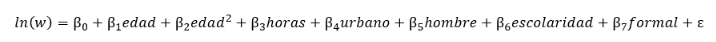

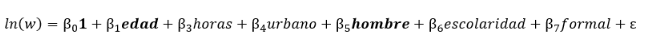

The sense of the squared age inclusion is to explain that the salary has a non-linean relationship with the age. In other words, this proposal tries to capture that at the beginning of working life, experience produces a positive marginal effect but at a certain point, the additional experience is no longer reflected in the salary and even causes it to decrease.

So, the knowledge about this point it's important to select a model. If an important percentage of the data is under this point, the model 3 is enough for our analysis, in other case, the model 1 is the best proposal.

In model 1:
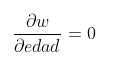

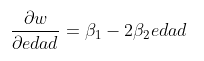

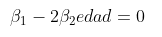

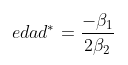

### WLS Regression

In [164]:
import statsmodels.api as sm

modelo =sm.WLS(y_2022, x_2022_1, weights=weights_2022)

resultados = modelo.fit()

print(resultados.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.486
Model:                            WLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     2401.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:51:02   Log-Likelihood:                -28418.
No. Observations:               25410   AIC:                         5.686e+04
Df Residuals:                   25399   BIC:                         5.695e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         4.6698      0.034    139.044

In [117]:
b1 = resultados.params['edad']
b2 = resultados.params['edadsq']

In [118]:
import math
calculo=(-b1/(2*b2))
edadlimite=math.floor(calculo)+1
print(f'The age when the salary begin decreasing is {edadlimite}')

The age when the salary begin decreasing is 49


In [119]:
# Counting data under edadlimite
total = len(x_2022)
bigger = x_2022[x_2022['edad'] > 49].shape[0]
lower = x_2022[x_2022['edad'] < 49].shape[0]

# Percentages
porcentaje_bigger = (bigger / total) * 100
porcentaje_lower = (lower / total) * 100

tabla_observaciones = pd.DataFrame({
    'Rango de Edad': ['Mayor a 49', 'Menor a 49'],
    'Cantidad de Observaciones': [bigger, lower],
    'Porcentaje': [f"{porcentaje_bigger:.2f}%", f"{porcentaje_lower:.2f}%"]
})

print(tabla_observaciones)

  Rango de Edad  Cantidad de Observaciones Porcentaje
0    Mayor a 49                       5874     23.12%
1    Menor a 49                      19090     75.13%


The aditional earning (1pp) in R^2 is not enough for losing 25% of our data. The selection will be model 1

## 7. Results

## ¿Sticky floor or Glass Ceiling?

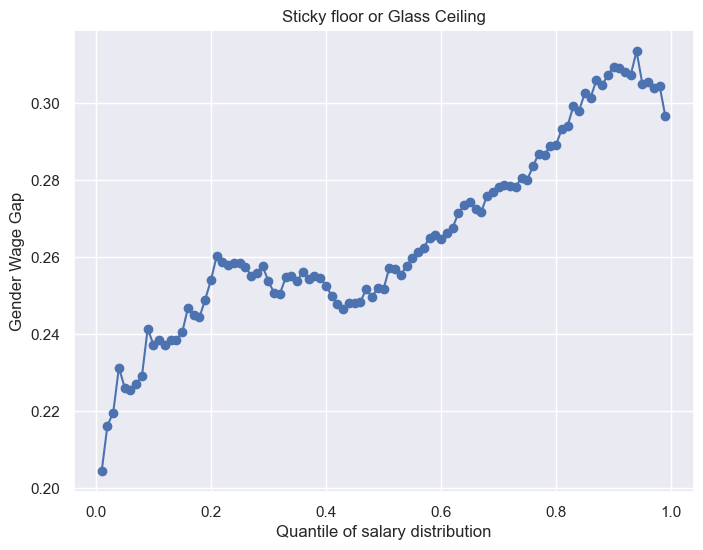

In [120]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# All percentiles
quantiles_range = range(1, 100)
quantiles = [q / 100 for q in quantiles_range]

beta_hombre_1 = []

for quantile in quantiles:
    model = sm.QuantReg(y_2022, x_2022_1).fit(q=quantile, weights=weights_2022)
    beta_hombre_1.append(model.params['hombre_1'])

# Graph
plt.figure(figsize=(8, 6))
plt.plot(quantiles, beta_hombre_1, marker='o', linestyle='-', color='b')
plt.xlabel('Quantile of salary distribution')
plt.ylabel('Gender Wage Gap')
plt.title('Sticky floor or Glass Ceiling')
plt.grid(True)
plt.show()

In [131]:
import numpy as np
import pandas as pd

percentiles = list(range(1, 100))  

percentiles_logsal = np.percentile(y_2022, q=percentiles)

df_percentiles = pd.DataFrame(percentiles_logsal, columns=['Percentiles'])
df_percentiles.index = percentiles  # Asignar los percentiles como índices

df_percentiles['salario'] = np.exp(df_percentiles['Percentiles'])

df_percentiles

,Percentiles,salario
1,4.616843,101.174164
2,4.876583,131.181648
3,5.132494,169.439139
4,5.292048,198.750045
5,5.371200,215.120815
...,...,...
95,8.251294,3832.582497
96,8.330372,4147.960503
97,8.452388,4686.249258
98,8.568482,5263.131968


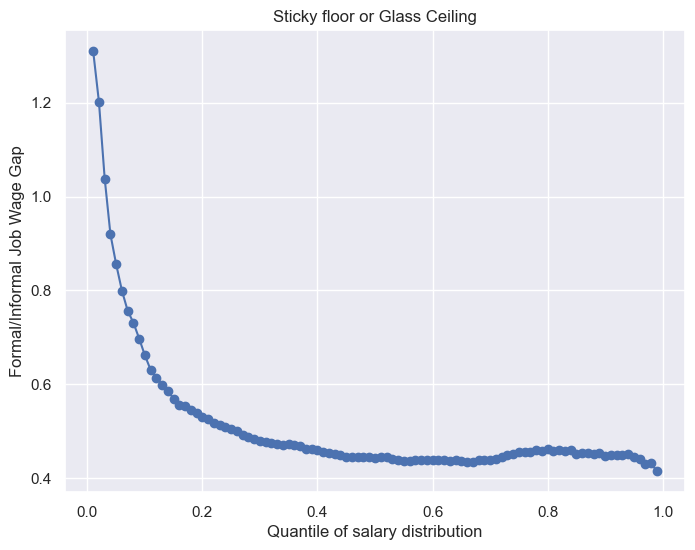

In [132]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

quantiles_range = range(1, 100)
quantiles = [q / 100 for q in quantiles_range]

beta_hombre_1 = []

for quantile in quantiles:
    model = sm.QuantReg(y_2022, x_2022_1).fit(q=quantile, weights=weights_2022)
    beta_hombre_1.append(model.params['formal_1'])
plt.figure(figsize=(8, 6))
plt.plot(quantiles, beta_hombre_1, marker='o', linestyle='-', color='b')
plt.xlabel('Quantile of salary distribution')
plt.ylabel('Formal/Informal Job Wage Gap')
plt.title('Sticky floor or Glass Ceiling')
plt.grid(True)
plt.show()

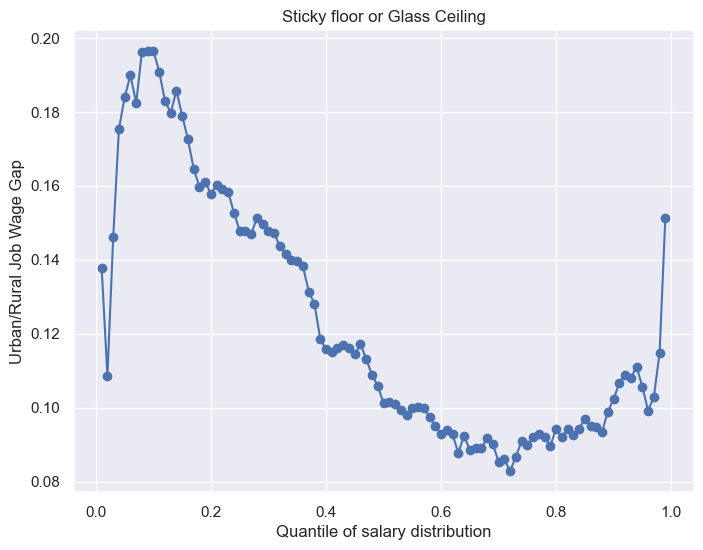

In [133]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

quantiles_range = range(1, 100)
quantiles = [q / 100 for q in quantiles_range]

beta_hombre_1 = []

for quantile in quantiles:
    model = sm.QuantReg(y_2022, x_2022_1).fit(q=quantile, weights=weights_2022)
    beta_hombre_1.append(model.params['urbano_1'])

plt.figure(figsize=(8, 6))
plt.plot(quantiles, beta_hombre_1, marker='o', linestyle='-', color='b')
plt.xlabel('Quantile of salary distribution')
plt.ylabel('Urban/Rural Job Wage Gap')
plt.title('Sticky floor or Glass Ceiling')
plt.grid(True)
plt.show()

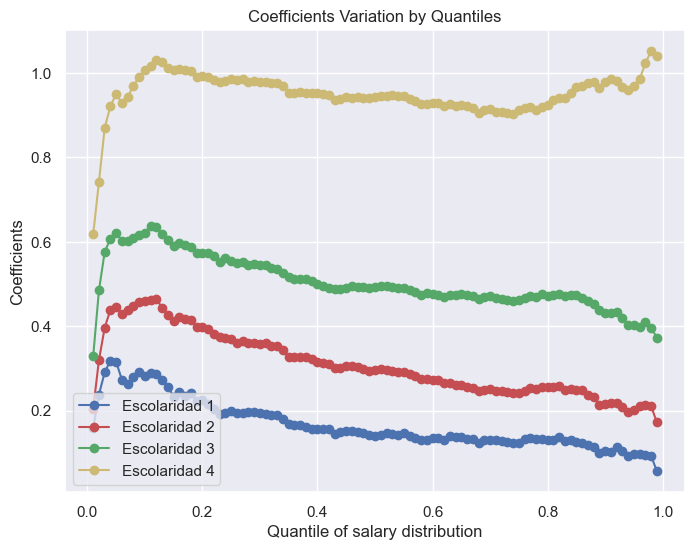

In [134]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

quantiles_range = range(1, 100)
quantiles = [q / 100 for q in quantiles_range]

beta_escolaridad_1 = []
beta_escolaridad_2 = []
beta_escolaridad_3 = []
beta_escolaridad_4 = []

for quantile in quantiles:
    model = sm.QuantReg(y_2022, x_2022_1).fit(q=quantile, weights=weights_2022)
    beta_escolaridad_1.append(model.params['escolaridad_1'])
    beta_escolaridad_2.append(model.params['escolaridad_2'])
    beta_escolaridad_3.append(model.params['escolaridad_3'])
    beta_escolaridad_4.append(model.params['escolaridad_4'])

plt.figure(figsize=(8, 6))
plt.plot(quantiles, beta_escolaridad_1, marker='o', linestyle='-', color='b', label='Escolaridad 1')
plt.plot(quantiles, beta_escolaridad_2, marker='o', linestyle='-', color='r', label='Escolaridad 2')
plt.plot(quantiles, beta_escolaridad_3, marker='o', linestyle='-', color='g', label='Escolaridad 3')
plt.plot(quantiles, beta_escolaridad_4, marker='o', linestyle='-', color='y', label='Escolaridad 4')
plt.xlabel('Quantile of salary distribution')
plt.ylabel('Coefficients')
plt.title('Coefficients Variation by Quantiles')
plt.legend()
plt.grid(True)
plt.show()

## Thanks!

juanfaca - 2023
juanfieecs@gmail.com